<p>MERCATOR: 8m (6), 16m (10), 32m (15).</p>
<p>Boia: 8m (1), 16m (4), 32m (10)</p>


In [1]:
import numpy as np
import pandas as pd
import cmocean as cm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime as dt

In [2]:
from datetime import timedelta

In [3]:
plt.rcParams['font.weight'] = 'bold'

In [4]:
%matplotlib inline

In [5]:
def meanError(x, y):
    """
    x = observed data
    y = modeladed data
    """
    from numpy import nanmean
    
    value = nanmean(100*(x - y)/x)
    return print('{:.2f}%'.format(value))

In [6]:
cd '/home/gus/Documentos/mestrado/dados-mestrado/dados-hycom/dado_filtrado'

/home/gus/Documentos/mestrado/dados-mestrado/dados-hycom/dado_filtrado


In [7]:
!ls

hycom_ul_filtrado_total.csv  hycom_vl_filtrado_total.csv


In [8]:
dfu = pd.read_csv('hycom_ul_filtrado_total.csv', delimiter=';');
dfv = pd.read_csv('hycom_vl_filtrado_total.csv', delimiter=';');

In [9]:
dfu.describe()

,8m,16m,32m,40m
count,7003.000000,7003.000000,7003.000000,7003.000000
mean,-1.747873,-1.031740,0.624693,2.169053
std,5.680779,4.994423,3.907072,3.779739
min,-23.167849,-20.251511,-13.896246,-10.322979
25%,-4.919393,-3.836728,-1.645094,-0.005657
50%,-1.245331,-0.729251,0.696035,2.024095
75%,1.834299,2.085569,2.692626,4.055423
max,23.433594,26.085158,32.558221,38.148906


### m/s para cm/s

In [10]:
#dfu.iloc[:,:16] = dfu.iloc[:,:16].apply(lambda x: x*100)
#dfv.iloc[:,:16] = dfv.iloc[:,:16].apply(lambda x: x*100)

In [11]:
dfu.head(2)

,8m,16m,32m,40m,time
0,0.073046,0.076505,0.058715,0.041306,2016-12-01 12:00:00
1,1.345355,1.359159,1.332073,1.305007,2016-12-01 13:00:00


In [12]:
dfu.tail(2)

,8m,16m,32m,40m,time
7003,NaN,NaN,NaN,NaN,2017-09-19 07:00:00
7004,NaN,NaN,NaN,NaN,2017-09-19 08:00:00


In [13]:
dfv.head(2)

,8m,16m,32m,40m,time
0,0.510213,0.352007,0.252902,0.258173,2016-12-01 12:00:00
1,2.570817,2.299909,2.111962,2.098929,2016-12-01 13:00:00


In [14]:
dfv.tail(2)

,8m,16m,32m,40m,time
7003,NaN,NaN,NaN,NaN,2017-09-19 07:00:00
7004,NaN,NaN,NaN,NaN,2017-09-19 08:00:00


### configurando as profundidades e o tempo do hycom

In [15]:
#depths = [int(ii) for ii in dfu.columns[:16]]
depths = [8, 16, 32, 40]

In [16]:
timeHycom = np.array(dfu.time[:].copy())

In [17]:
timeHycom = [dt.strptime(ii,'%Y-%m-%d %H:%M:%S') for ii in timeHycom]

In [18]:
min(timeHycom), max(timeHycom)

(datetime.datetime(2016, 12, 1, 12, 0), datetime.datetime(2017, 9, 19, 8, 0))

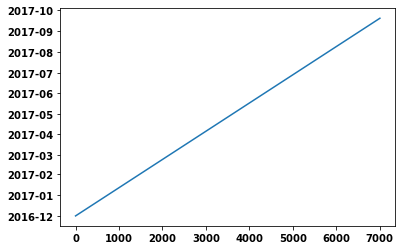

In [19]:
plt.plot(timeHycom)

### calculo das componentes paralelas e perpendiculares do hycom

In [ ]:
#phi = np.deg2rad(60)
#ul = u * np.cos(phi) + v * np.sin(phi)
#vl = -u * np.sin(phi) + v * np.cos(phi)

In [ ]:
#dful = pd.DataFrame(ul)
#dfvl = pd.DataFrame(vl)

In [ ]:
#dful.columns = [str(ii) for ii in depths]
#dfvl.columns = [str(ii) for ii in depths]

### excluindo lixo

In [ ]:
#del u, v, ul, vl, phi

### plot das componentes paralelas e perpendiculares

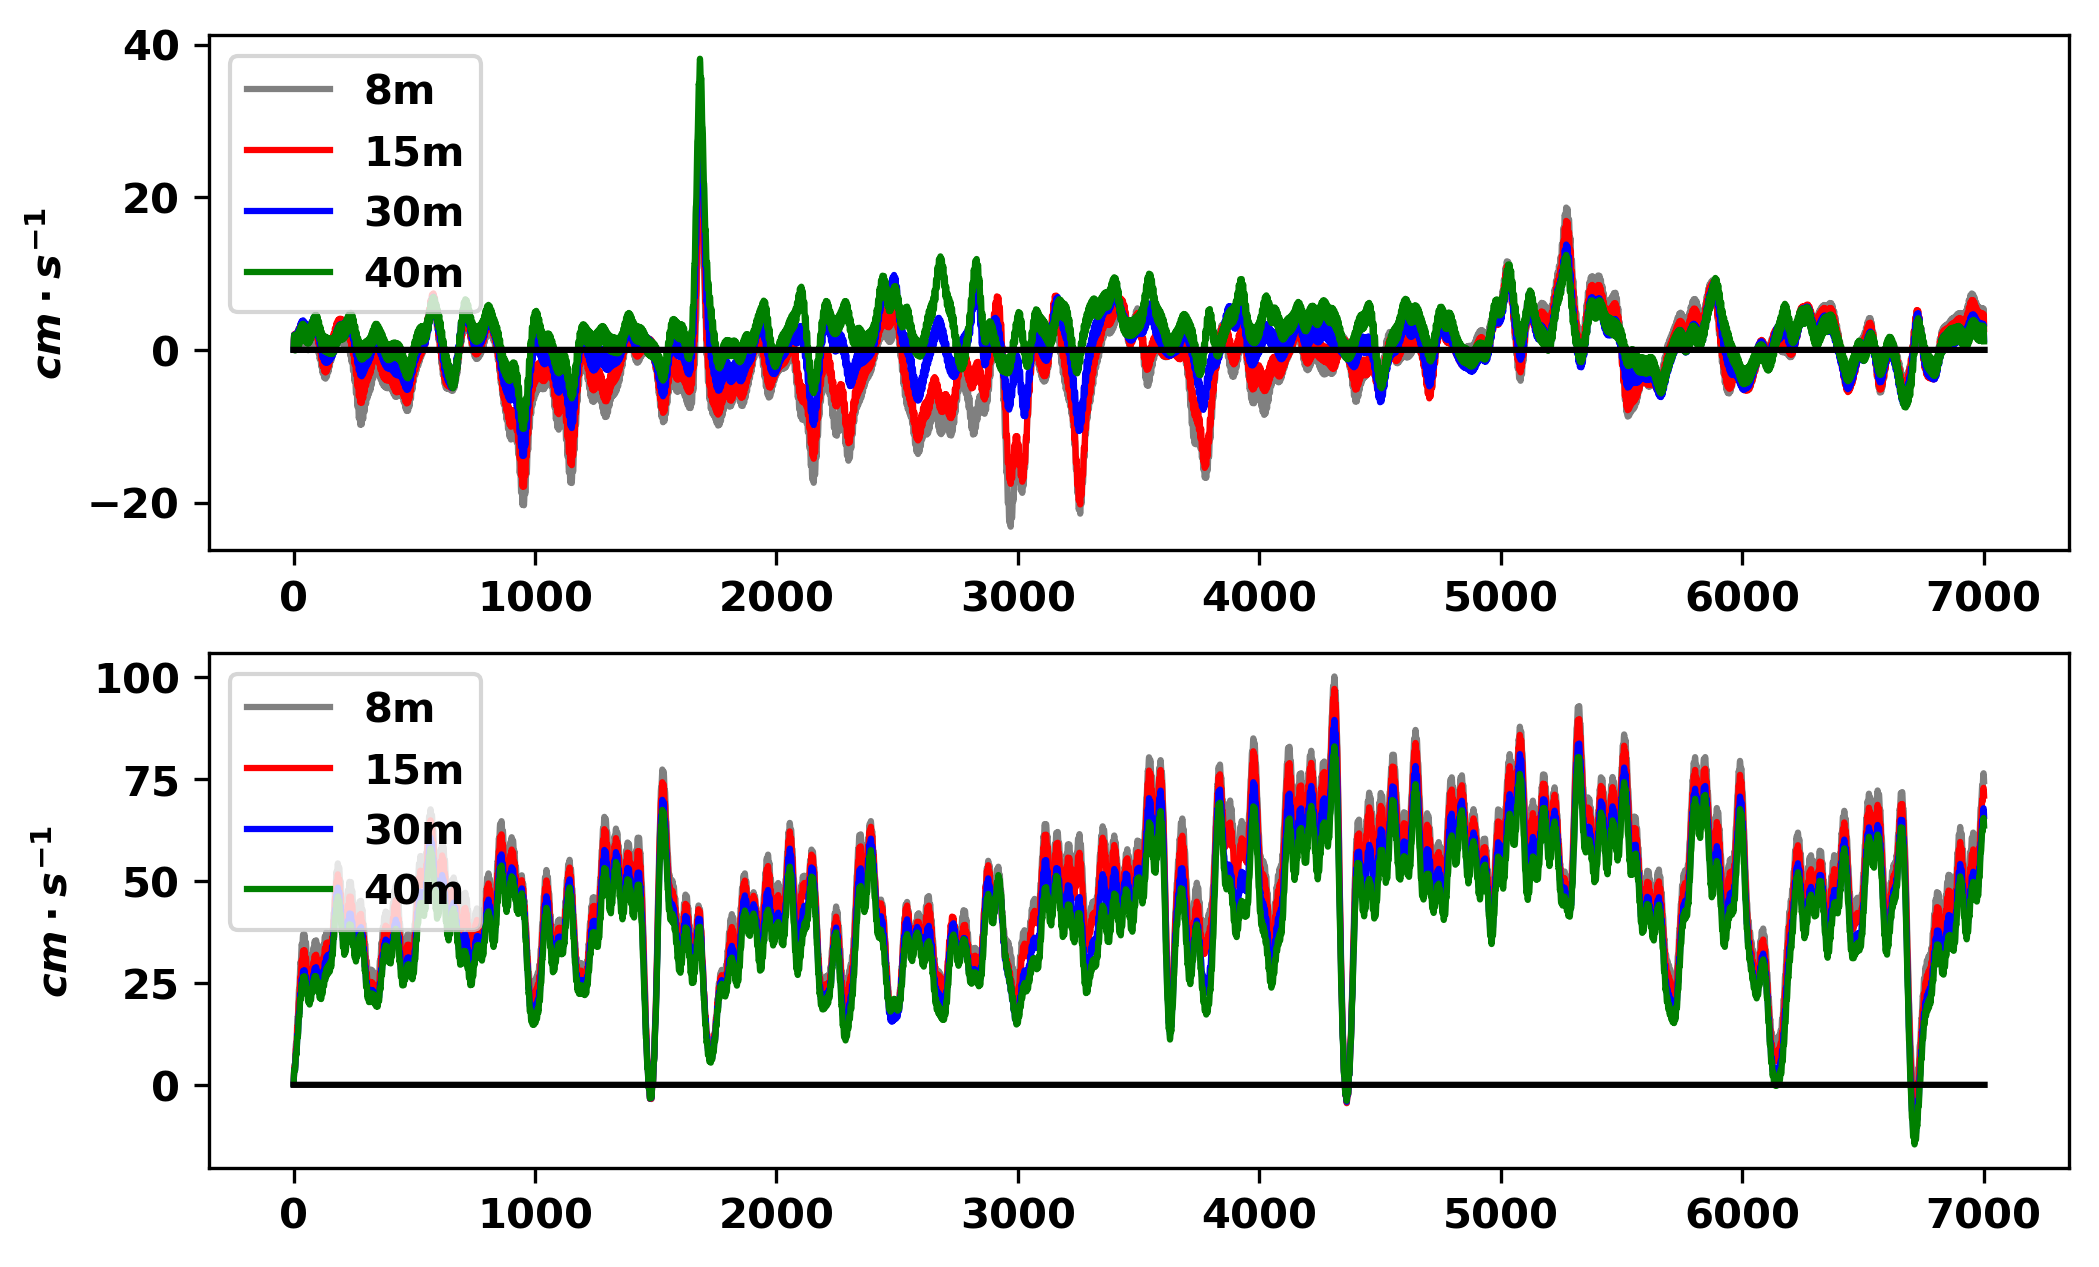

In [23]:
linhaZero = np.zeros(len(dfu))

fig, ax = plt.subplots(nrows=2, figsize=(8,5), dpi=300)

# perpendicular
ax[0].plot(dfu.iloc[:,0],c='grey',label='8m')
ax[0].plot(dfu.iloc[:,1],c='red',label='15m')
ax[0].plot(dfu.iloc[:,2],'blue',label='30m')
ax[0].plot(dfu.iloc[:,3],'green',label='40m')
ax[0].plot(linhaZero,c='black')

# paralela
ax[1].plot(dfv.iloc[:,0],c='grey',label='8m')
ax[1].plot(dfv.iloc[:,1],c='red',label='15m')
ax[1].plot(dfv.iloc[:,2],c='blue',label='30m')
ax[1].plot(dfv.iloc[:,3],c='green',label='40m')
ax[1].plot(linhaZero,c='black')


ax[0].set_ylabel('$cm \cdot s^{-1}$')
ax[1].set_ylabel('$cm \cdot s^{-1}$')

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

### carregando os dados tratados da boia

In [ ]:
import os

In [ ]:
path = '/home/gus/Documentos/mestrado/dados-mestrado/dados-adcp-completos/'

In [ ]:
os.listdir(path)

In [ ]:
#path = '/home/gus/Documentos/mestrado/dados-mestrado/dados-adcp-completos/'

vlboia = pd.read_csv(path + 'vl_filtrado_total.csv', delimiter=';')
ulboia = pd.read_csv(path + 'ul_filtrado_total.csv', delimiter=';')

In [ ]:
# profundidades boia

depthBoia = list(np.arange(5.5, 55, 2.5))
depthBoia = [str(ii) for ii in depthBoia]


In [ ]:
len(ulboia)

In [ ]:
tempoBoia = ulboia.time

In [ ]:
tempoBoia = [dt.strptime(ii,'%Y-%m-%d %H:%M:%S') for ii in tempoBoia]

In [ ]:
ulboia['year'] = pd.DatetimeIndex(tempoBoia).year
ulboia['month'] = pd.DatetimeIndex(tempoBoia).month
ulboia['day'] = pd.DatetimeIndex(tempoBoia).day

In [ ]:
vlboia['year'] = pd.DatetimeIndex(tempoBoia).year
vlboia['month'] = pd.DatetimeIndex(tempoBoia).month
vlboia['day'] = pd.DatetimeIndex(tempoBoia).day

In [ ]:
ulboia.drop('time', inplace=True, axis=1)
vlboia.drop('time', inplace=True, axis=1)

In [ ]:
ulboia.head(3)

In [ ]:
min(tempoBoia), max(tempoBoia)

## calculo das medias diarias das componentes zonal e meridional

### ADCP

In [ ]:
ulboia24 = ulboia.groupby(['year','month','day']).mean().reset_index()
vlboia24 = vlboia.groupby(['year','month','day']).mean().reset_index()

In [ ]:
#ulboia24 = ulboia24.iloc[1:,:]

In [ ]:
#vlboia24 = vlboia24.iloc[1:, :]

In [ ]:
len(ulboia), len(dfu)

In [ ]:
dfu.iloc[0], ulboia.iloc[0]

In [ ]:
dfu.iloc[-1], ulboia.iloc[-1]

### HYCOM

In [ ]:
timeHycom =  pd.Series(timeHycom)

In [ ]:
dfu['year'] = timeHycom.dt.year
dfu['month'] = timeHycom.dt.month
dfu['day'] = timeHycom.dt.day

In [ ]:
dfv['year'] = timeHycom.dt.year
dfv['month'] = timeHycom.dt.month
dfv['day'] = timeHycom.dt.day

In [ ]:
dfu24 = dfu.groupby(['year', 'month', 'day']).mean().reset_index()
dfv24 = dfv.groupby(['year', 'month', 'day']).mean().reset_index()

In [ ]:
#dfu24.drop(['time'], axis=0, inplace=True)
#dfv24.drop(['time'], axis=0, inplace=True)

In [ ]:
len(ulboia24), len(dfu24)

In [ ]:
ulboia24.head(3)

In [ ]:
dfu24.head(3)

In [ ]:
#ulboia.tail(3)

In [ ]:
#dfu.tail(3)

### plot das series temporais

In [ ]:
# perpendicular a costa
linhaZero = np.zeros(len(ulboia))

fig, ax = plt.subplots(nrows=3, figsize=(12,8))

# 8m
ax[0].plot(ulboia24.iloc[:, 4], c='#216e9c',label='adcp')
ax[0].plot(dfu24.iloc[:, 7], c='orangered',label='Hycom')
ax[0].plot(linhaZero, c='black')

# 16m
ax[1].plot(ulboia24.iloc[:, 8], c='#216e9c',label='adcp')
ax[1].plot(dfu24.iloc[:, 11], c='orangered',label='Hycom')
ax[1].plot(linhaZero,c='black')

#32 m
ax[2].plot(ulboia24.iloc[:, 14], c='#216e9c',label='adcp')
ax[2].plot(dfu24.iloc[:, 14], c='orangered',label='Hycom')
ax[2].plot(linhaZero,c='black')

ax[0].legend()
ax[1].legend()
ax[2].legend()

# profundidades
ax[0].text(0, 10, '8m', fontsize=20)
ax[1].text(0, 10, '16m', fontsize=20)
ax[2].text(0, 10, '32m', fontsize=20)

#titulo 
ax[0].set_title('Cross-shore', fontsize=20)

#ylabel
ax[0].set_ylabel(r'$cm\cdot s^{-1}$', fontsize=14)
ax[1].set_ylabel(r'$cm\cdot s^{-1}$', fontsize=14)
ax[2].set_ylabel(r'$cm\cdot s^{-1}$', fontsize=14)


ax[2].set_xlabel('Time (days)')

In [ ]:
# paralela a costa
fig, ax = plt.subplots(nrows=3, figsize=(12,8))

# 8m
ax[0].plot(vlboia.iloc[:,1], c='#216e9c',label='ADCP')
ax[0].plot(dfv.iloc[:,4], c='orangered',label='HYCOM')
ax[0].plot(linhaZero,c='black')

# 16m
ax[1].plot(vlboia.iloc[:,4], c='#216e9c',label='ADCP')
ax[1].plot(dfv.iloc[:,7], c='orangered',label='HYCOM')
ax[1].plot(linhaZero,c='black')

#32 m
ax[2].plot(vlboia.iloc[:,10], c='#216e9c',label='ADCP')
ax[2].plot(dfv.iloc[:,10], c='orangered',label='HYCOM')
ax[0].plot(linhaZero,c='black')


ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_ylim([-10, 150])
ax[1].set_ylim([-10, 150])
ax[2].set_ylim([-10, 150])


#titulo 
ax[0].set_title('Longshore', fontsize=20)

ax[0].set_ylabel(r'$cm\cdot s^{-1}$')
ax[1].set_ylabel(r'$cm\cdot s^{-1}$')
ax[2].set_ylabel(r'$cm\cdot s^{-1}$')

# profundidades
ax[0].text(0, 60, '8m', fontsize=20)
ax[1].text(0, 60, '16m', fontsize=20)
ax[2].text(0, 60, '32m', fontsize=20)


ax[2].set_xlabel('Time (days)')

### calculo dos parametros estatisticos

In [ ]:
import mvalidation

In [ ]:
dfu.head()

In [ ]:
# z= 8, 16 e 32 m
indexHycom = [6, 10, 15]
indexBoia = [4, 7, 10]

# skill

### paralelo

In [ ]:
for ii, jj in zip(indexBoia, indexHycom):
    print(mvalidation.skill(vlboia.iloc[12:,ii], dfv.iloc[:,jj]))

### perpendicular

In [ ]:
for ii, jj in zip(indexBoia, indexHycom):
    print(mvalidation.skill(ulboia.iloc[12:,ii], dfu.iloc[:,jj]))

# RMSE

### paralelo

In [ ]:
for ii, jj in zip(indexBoia, indexHycom):
    print(mvalidation.rmse(vlboia.iloc[12:,ii], dfv.iloc[:,jj]))

### perpendicular

In [ ]:
for ii, jj in zip(indexBoia, indexHycom):
    print(mvalidation.rmse(ulboia.iloc[12:,ii], dfu.iloc[:,jj]))

## Correlação

#### perpendicular

In [ ]:
for ii, jj in zip(indexBoia, indexHycom):
    print(ulboia.iloc[:,ii].corr(dfu.iloc[12:,jj], method = 'pearson'))

#### paralela

In [ ]:
for ii, jj in zip(indexBoia, indexHycom):
    print(vlboia.iloc[12:,ii].corr(dfv.iloc[:,jj], method = 'pearson'))

### Erro médio

In [ ]:
for ii, jj in zip(indexBoia, indexHycom):
    #print(vlboia24.iloc[:10,ii].corr(dfv24.iloc[:,jj], method = 'pearson'))
    meanError(vlboia.iloc[12:, ii], dfv.iloc[:,ii])

In [ ]:
for ii, jj in zip(indexBoia, indexHycom):
    #print(vlboia24.iloc[:10,ii].corr(dfv24.iloc[:,jj], method = 'pearson'))
    meanError(ulboia.iloc[12:,ii], dfu.iloc[:,ii])